<div class='bar_title'></div>

*Introduction to Data Science*

# Deep Learning on Tabular Data

Gunther Gust<br>
Chair of Enterprise AI <br>
WS 2024/2025 <br>
Data Driven Decisions Group <br>
Center for Artificial Intelligence and Data Science (CAIDAS)

<img src='https://raw.githubusercontent.com/vhaus63/ids_data/main/d3.png?raw=true' style='width:20%; float:left;' />

<img src="https://raw.githubusercontent.com/vhaus63/ids_data/main/CAIDASlogo.png" style="width:20%; float:left;" />

__Sources__

<img src="https://images-na.ssl-images-amazon.com/images/I/516YvsJCS9L._SX379_BO1,204,203,200_.jpg" width="200" align="right"/>

In this lecture, will take a first look into Deep Learning using ressources from the book of 
**Jeremy Howard and Sylvian Gugger: "Deep Learning for Coders with Fastai and PyTorch: AI Applications without a PhD." (2020).**

It's freely available as interactive [Jupyter Notebook](https://github.com/fastai/fastbook).

Additional materials are taken from:
- https://github.com/fastai/fastbook/blob/master/09_tabular.ipynb
- https://www.fast.ai/2018/04/29/categorical-embeddings/
- https://confusedcoders.com/data-science/deep-learning/how-to-apply-deep-learning-on-tabular-data-with-fastai 

## Motivation

At the end of 2015, the [Rossmann sales competition](https://www.kaggle.com/c/rossmann-store-sales) ran on Kaggle. Competitors were given a wide range of information about various stores in Germany, and were tasked with trying to predict sales on a number of days. The goal was to help the company to __manage stock__ properly and be able to __satisfy demand without holding unnecessary inventory.__ The official training set provided a lot of information about the stores. It was also permitted for competitors to use additional data, as long as that data was made public and available to all participants.

One of the gold medalists used deep learning, in one of the __earliest known examples__ of a __state-of-the-art deep learning tabular model.__ Their method involved far __less feature engineering__, based on domain knowledge, than those of the other gold medalists. The paper, ["Entity Embeddings of Categorical Variables"](https://arxiv.org/abs/1604.06737) describes their approach. The authors state:

> Entity embedding not only **reduces memory usage** and **speeds up neural networks compared with one-hot encoding**, but more importantly by **mapping similar values close to each other in the embedding space** it reveals the intrinsic properties of the categorical variables... 

> [It] is especially useful for datasets with lots of **high cardinality features**, where other methods tend to overfit... As entity embedding defines a distance measure for categorical variables it can be used for visualizing categorical data and for data clustering.

### Categorical Embedding Examples

We will have a look at the examples from the paper ["Entity Embeddings of Categorical Variables"](https://arxiv.org/abs/1604.06737) 

**State embeddings and map**

<img alt="State embeddings and map" width="50%" caption="State embeddings and map (courtesy of Cheng Guo and Felix Berkhahn)" id="state_emb" src="https://raw.githubusercontent.com/fastai/fastbook/master/images/att_00015.png">

On the left is a plot of the embedding matrix for the possible values of the `State` category. For a categorical variable we call the possible values of the variable its "levels" (or "categories" or "classes"), so here one level is "Berlin," another is "Hamburg," etc. On the right is a map of Germany. The actual physical locations of the German states were not part of the provided data, yet the model itself learned where they must be, based only on the behavior of store sales!

**Store Distances**

The distance between store embeddings against the actual geographic distance between the stores - they match very closely!

<img alt="Store distances" width="50%" caption="Store distances (courtesy of Cheng Guo and Felix Berkhahn)" id="store_emb" src="https://raw.githubusercontent.com/fastai/fastbook/master/images/att_00016.png">

**Date Embedding**

Days and months that are near each other on the calendar ended up close as embeddings too.

<img alt="Date embeddings" width="50%" caption="Date embeddings" id="date_emb" src="https://raw.githubusercontent.com/fastai/fastbook/master/images/att_00017.png">

How can we train such embeddings?

## Artificial Neural Networks

__What are neural networks?__

- Biological neural networks have interconnected neurons with dendrites that receive inputs, then based on these inputs they produce an output signal through an axon to another neuron
- Artificial Neural Networks (ANN) are a machine learning framework that attempts to mimic the learning pattern of natural biological neural networks
- The creation of ANN begins with the most basic form, a single perceptron

<img src="./images/05/DALL·E 2023-10-07 15.23.07.png" width="30%"/>


### The Perceptron

Developed by Frank Rosenblatt in 1957
- Perceptrons have one or more weighted inputs, a bias, an activation function, and a single output
- A perceptron receives inputs, multiplies them by some weight, and then passes them into an activation function to produce an output
- The key idea is to “fire” / activate the neuron only if a sufficiently strong input signal is detected

<img src="https://miro.medium.com/max/2870/1*n6sJ4yZQzwKL9wnF5wnVNg.png" width="50%"/>


__Different Activation Functions and their Graphs__

<img src="https://miro.medium.com/max/1200/1*ZafDv3VUm60Eh10OeJu1vw.png" width="50%"/>

ReLU is the most commonly used Activation Functions, because of its simplicity during backpropagation and sicne its not computationally expensive.

### Multi-layer Perceptron aka. Neural Networks

A MLP is composed of multiple layers of perceptrons 

<img src="https://camo.githubusercontent.com/8a0c06dc8a564e1e7732169d97e2685eafc2b98b5f4915f4c0cb6bf2c1649a37/68747470733a2f2f7777772e64726f70626f782e636f6d2f732f717334746f6a763575356834386c662f6d756c74696c617965725f70657263657074726f6e2e706e673f7261773d31" style="width:80%" />

__Layers of a MLP__

- Initial layer = input layer which is fed by the feature inputs
- Last layer = output layer which creates the resulting outputs
- Any layers in between are known as hidden layers because they do not directly “observe” the feature inputs or outputs

__Universal approximation theorem__

From Wikipedia:

_"In the mathematical theory of artificial neural networks, the universal approximation theorem states that a feed-forward network with __a single hidden layer__ containing a finite number of neurons can approximate any continuous function [...] when given appropriate parameters; however, it does not touch upon __the algorithmic learnability of those parameters__."_

### Training Neural Networks

Learning is adjustment of the weights of the connections between perceptrons according to some modification rule. 

- The Backpropagation algorithm searches for weight values that minimize the total error of the network over the set of training examples

It consists of the repeated application of the following two passes.

- __Forward pass__: in this step the network is activated on one example and the error of (each neuron of) the output layer is computed
- __Backward pass__: in this step the network error is used for updating the weights

__Forward and Backward paths__

<img src="https://miro.medium.com/max/3108/1*6q2Rgd8W9DoCN9Wfwc_9gw.png" style="width:60%" />

For an illustrative explanation of how to train a neural network using backpropagation see [this video](https://www.youtube.com/watch?v=iyn2zdALii8&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&index=6&ab_channel=StatQuestwithJoshStarmer), [this series](https://www.youtube.com/watch?v=aircAruvnKk) and related videos. <span style="color:red">__This content is relevant for the exam!__</span>

### Loss function

The loss function is a way for a model to measure how well it’s doing. Imagine you have a goal, like correctly classifying pictures of cats and dogs. Each time the model makes a guess, the loss function calculates how far off that guess is from the true answer. It gives a number (called "loss" or "error") that __tells you how bad the guess was.__

The goal of __training__ the model is to make the loss as small as possible by __minimizing the loss function.__

For more explanation see e.g. [this video](https://www.youtube.com/watch?v=QBbC3Cjsnjg&t=381s&ab_channel=CodeEmporium). Common choices are __MeanSquaredError (MSE)__ loss for regression tasks and __CrossEntropy loss__ for classification tasks, see [here](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html) for the math. 


### MLP Example

We will work with a sample of the adult dataset which has some census information on individuals. We'll use it to train a model to predict whether salary is greater than $50k or not.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = 'https://raw.githubusercontent.com/vhaus63/ids_data/refs/heads/main/adult_data.csv'
adult_data = pd.read_csv(file_path)
adult_data = adult_data.assign(salary=(adult_data['salary']=='>=50k').astype(int))
y = adult_data['salary']
X = adult_data.drop(columns=['salary'])

In [3]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25, random_state = 0)

Impute missing values (we will omit the categorical features here)

In [4]:
simple_imputer = SimpleImputer()
numCols = X.select_dtypes(['int', 'float']).columns.to_list()
train_X_num = pd.DataFrame(simple_imputer.fit_transform(train_X[numCols]), columns=numCols, index=train_X.index)
val_X_num = pd.DataFrame(simple_imputer.transform(val_X[numCols]), columns=numCols, index=val_X.index)

Standardize numeric features

In [5]:
scaler = StandardScaler()
train_X_num_standardized = pd.DataFrame(scaler.fit_transform(train_X_num), columns=numCols, index=train_X.index)
val_X_num_standardized = pd.DataFrame(scaler.transform(val_X_num), columns=numCols, index=val_X.index)

Train model

In [6]:
model = MLPClassifier()
model.fit(train_X_num_standardized, train_y)

MLPClassifier()

Evaluate predictions

In [7]:
preds = model.predict(val_X_num_standardized)
accuracy_score(val_y, preds)

1.0

__Advantages of Multi-layer Perceptrons__

- Capability to learn non-linear models.
- Capability to learn models in real-time (on-line learning) using `partial_fit`

__The disadvantages of Multi-layer Perceptrons__
- MLP with hidden layers have a non-convex loss function where there exists more than one __local minimum.__ Therefore different random weight initializations can lead to different validation accuracies.
- MLP requires tuning a number of __hyperparameters__ such as the number of hidden neurons, layers, and iterations.
- MLP is sensitive to __feature scaling.__

__Is this already deep learning?__

From Wikipedia: 

_"Deep learning [...] uses multiple layers to progressively extract higher level features from the raw input. For example, in image processing, lower layers may identify edges, while higher layers may identify the concepts relevant to a human such as digits or letters or faces."_ 


## Exercises - XOR Problem

The XOR (exclusive OR) is a logical operation that takes two binary outputs and returns TRUE if exactly one of them is TRUE. For example:
- f(1, 0) = 1
- f(1, 1) = 0
- f(0, 1) = 1
- f(0, 0) = 0

With `f` as an arbitrary function. We provide you a XOR-like dataset with 80 samples and 2 labels as below:

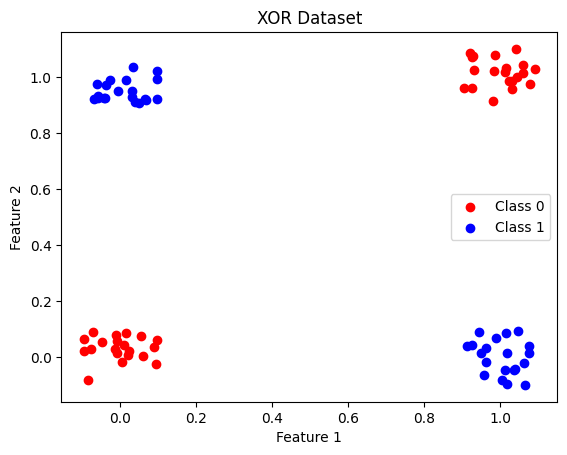

In [8]:
# ONLY RUN & DO NOT MODIFY
import numpy as np
import matplotlib.pyplot as plt

# Create XOR dataset
np.random.seed(0)

# Create points around the corners of the XOR problem
X_corners = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_corners = np.array([0, 1, 1, 0])

# Generate additional random samples in each quadrant
num_samples_per_corner = 20
X_samples = []
y_samples = []

for x, y in X_corners:
    # Generate samples around each corner
    X_samples.append(np.random.rand(num_samples_per_corner, 2) * 0.2 + np.array([x - 0.1, y - 0.1]))
    y_samples.append(np.full((num_samples_per_corner,), y_corners[np.where((X_corners == [x, y]).all(axis=1))[0][0]]))

X_samples = np.vstack(X_samples)
y_samples = np.concatenate(y_samples)

# Step 2: Split Data into Training and Validation Sets
# Ensure that each class is represented in both sets
indices = np.arange(len(X_samples))
np.random.shuffle(indices)

# Manually split to maintain distribution
train_indices = []
val_indices = []

for i in range(4):  # For each corner
    corner_indices = indices[i*num_samples_per_corner:(i+1)*num_samples_per_corner]
    train_indices.extend(corner_indices[:int(num_samples_per_corner * 0.7)])  # 70% for training
    val_indices.extend(corner_indices[int(num_samples_per_corner * 0.7):])    # 30% for validation

train_X_xor = X_samples[train_indices]
train_y_xor = y_samples[train_indices]
val_X_xor = X_samples[val_indices]
val_y_xor = y_samples[val_indices]

plt.scatter(X_samples[y_samples == 0][:, 0], X_samples[y_samples == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_samples[y_samples == 1][:, 0], X_samples[y_samples == 1][:, 1], color='blue', label='Class 1')
plt.title('XOR Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Your tasks are:

1. Define an MLP with one hidden layer with one neuron and fit this dataset. Run 1000 iterations.
2. Define an MLP with one hidden layers with eight neurons and fit this dataset. Run 1000 iterations.
3. Look at the decision boundary, and try to explain the results. Hint: check which model provides better decision boundaries, and why it is the case.

Hint: use `train_X_xor, train_y_xor` for training, and `val_X_xor`, `val_y_xor` for testing.

In [9]:
# YOUR CODE HERE
# define, fit, and predict the first model with one hidden layer. 
# Hint 1: MLPClassifier(hidden_layer_sizes=(number_layer, ), max_iter=num_iterations)
# Hint 2: the accuracy should never reach 80% 
mlp_hidden_1 = ... # define the model
mlp_hidden_1.fit(...) # fit the model
preds_hidden_1 = ... # predict the model
accuracy_score(...) # compute the accuracy

AttributeError: 'ellipsis' object has no attribute 'fit'

In [ ]:
# YOUR CODE HERE
# define, fit, and predict the first model with 8 hidden layers. 
# Hint 1: MLPClassifier(hidden_layer_sizes=(number_layer, ), max_iter=num_iterations)
# Hint 2: the accuracy can reach 100%. Try to re-run until you get accuracy=1.0
mlp_hidden_8 = ... # define the model
mlp_hidden_8.fit(...) # fit the model
preds_hidden_8 = ... # predict the model
accuracy_score(...) # compute the accuracy

Now, we plot the decision boundary of 2 cases:

In [ ]:
# RUN & DO NOT MODIFY
def plot_decision_boundary(model, val_X, val_y, num_layer):
    xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])  # Predicting over the grid
    Z = Z.reshape(xx.shape)

    # Plotting decision boundary and validation samples
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')

    # Plot validation points
    plt.scatter(val_X[val_y == 0][:, 0], val_X[val_y == 0][:, 1], color='darkred', label='Val Class 0', marker='x')
    plt.scatter(val_X[val_y == 1][:, 0], val_X[val_y == 1][:, 1], color='darkblue', label='Val Class 1', marker='x')

    plt.title(f'Decision Boundary of MLP with {num_layer} Hidden Layer')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

### Decision Boundary of MLP with 1 hidden layer

In [ ]:
# Run this after finishing the above tasks
plot_decision_boundary(mlp_hidden_1, val_X_xor, val_y_xor, 1)

### Decision Boundary of MLP with 8 hidden layers

In [ ]:
# Run this after finishing the above tasks
plot_decision_boundary(mlp_hidden_8, val_X_xor, val_y_xor, 8)

## Deep Learning on Tabular Data with *fast.ai* 

**The Mission of [fast.ai](https://www.fast.ai/about.html): Making neural nets uncool again**

Deep learning is transforming the world. We are making deep learning easier to use and getting more people from all backgrounds involved through our:

- [free courses for coders](http://course.fast.ai/)
- software library: [fastai for PyTorch](http://docs.fast.ai/)
- cutting-edge research
- community

The world needs everyone involved with AI, no matter how unlikely your background.

First, let's import everything we need for the tabular application.

In [10]:
from fastai.tabular.all import *
from sklearn.model_selection import train_test_split

### *fast.ai* Datasets

Tabular data usually comes in the form of a delimited file (such as .csv) containing variables of different kinds: text/category, numbers, and perhaps some missing values. This is nothing new to what we already know from the previous lectures.

*Fast.ai's* [external data functions](https://docs.fast.ai/data.external.html) provide several useful datasets that we might be interested in using in our models.

We will again work with a sample of the __adult dataset__ which has some census information on individuals. We'll use it to train a model to predict whether __salary is greater than \$50k__ or not. This time, we'll let *fast.ai* do the datahandling work.

In [11]:
path = untar_data(url=URLs.ADULT_SAMPLE)
path.ls()

(#3) [Path('C:/Users/ggust/.fastai/data/adult_sample/adult.csv'),Path('C:/Users/ggust/.fastai/data/adult_sample/export.pkl'),Path('C:/Users/ggust/.fastai/data/adult_sample/models')]

`untar_data()`downloads a dataset from `url` and unpacks it to `path`.

In [12]:
df = pd.read_csv(path/'adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


Here all the information that will form our input is in the 14 first columns, and the dependent variable is the last column. We will split our input between two types of variables: categorical and continuous.

__Categorical and continuous variables__

- **Categorical variables** (like workclass or education) will be replaced by a category - a unique id that identifies them - before they are passed through an embedding layer.
- **Continuous variables** (like age) will be normalized and then directly fed to the model.

We can specify our categorical and continuous column names, as well as the name of the dependent variable:

In [13]:
y_names = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']

__Tabular data preprocessing__

fast.ai contains classes that define [transformations](https://docs.fast.ai/tabular.core.html#TabularProc) for preprocessing dataframes of tabular data. Preprocessing includes things like

- `Categorify`: replacing non-numerical variables by categories (each value obtains a category id, as in label encoding)
- `FillMissing`: filling missing values (default fill strategy: median)
- `Normalize:` normalizing continuous variables

We can define a list of Transforms that will be applied to our variables. Here we transform all categorical variables into categories. We also replace missing values for continuous variables by the median column value and normalize those.

In [14]:
procs = [FillMissing, Categorify, Normalize]

Note that the __ordering__ of the tranformations matters. The typical sequence is to first handle missing values, then categorize categorical variables (including newly created categorial variables that indicate missingness), and finally normalize continuous variables. 

__Training and validation sets__

To split our data into training and validation sets, we use valid indexes: We don't split the entire dataset anymore, but only the index column. We can then paste the indices for the training respectively test set to the DataLoader function, that will use them to perform the split internally.

In [15]:
train_idx, valid_idx = train_test_split(df.index, test_size=0.25, random_state = 0)
train_idx[:5] 

Index([26464, 16134, 4747, 8369, 5741], dtype='int64')

### From data to dataloaders

fastai uses [DataLoaders](https://docs.fast.ai/data.load.html) to get the data ready for training.

A data loader usually combines a __dataset and a sampler,__ and provides an __iterable__ over the given dataset. [fastai](https://docs.fast.ai/data.load.html) includes a replacement for [Pytorch's DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) which is largely API-compatible, and adds a lot of useful functionality and flexibility.

How do we create a DataLoader?

__Creating the DataLoader__

After the preprocessing, we're ready to pass this information to a [TabularDataLoader](https://docs.fast.ai/tabular.data.html#TabularDataLoaders) to create the DataLoaders that we'll use for training.

In [16]:
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, 
                                  y_names=y_names,
                                  cat_names = cat_names,
                                  cont_names = cont_names,
                                  valid_idx=valid_idx,
                                  procs = procs,
                                  bs=64                     # batch size
                                  ) 

In [17]:
dls.cat_names

(#7) ['workclass','education','marital-status','occupation','relationship','race','education-num_na']

### Exercise
Note here that we have an additional categorical column called `education-num_na`. Why?

_Answer here_

We can grab a mini-batch of data and take a look. `show_batch` shows a batch of data in a convenient way:

__Note__: As we pick out batches randomly, the output of `show_batch` may not correspond to the output below. 

In [18]:
dls.show_batch()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,Private,Some-college,Never-married,Adm-clerical,Other-relative,Black,False,22.000000,254547.000590,10.0,<50k
1,Self-emp-not-inc,Some-college,Never-married,Farming-fishing,Own-child,White,False,25.000000,60827.995804,10.0,<50k
2,Federal-gov,Bachelors,Married-civ-spouse,Protective-serv,Husband,White,False,34.000000,198265.000253,13.0,<50k
3,Private,7th-8th,Never-married,Handlers-cleaners,Unmarried,White,False,26.000000,483822.008935,4.0,<50k
4,Private,Some-college,Widowed,Other-service,Unmarried,White,False,65.000000,243569.002325,10.0,<50k
5,State-gov,Doctorate,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,False,33.000000,119628.000200,16.0,<50k
6,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,White,False,40.000000,145159.998801,10.0,<50k
7,Private,HS-grad,Divorced,Other-service,Not-in-family,White,False,35.000000,379959.003651,9.0,<50k
8,Private,Some-college,Never-married,Handlers-cleaners,Own-child,Black,False,22.999999,196508.000385,10.0,<50k
9,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,False,46.000000,54190.006283,9.0,<50k


In the processing step, the categorical variables are replaced by IDs and the continuous variables are normalized. The codes corresponding to categorical variables are all put together, as are all the continuous variables.

But how does the data exactly look like for our model? Let's have a look:


In [19]:
batch = dls.one_batch()
batch

(tensor([[ 5, 16,  3,  5,  1,  5,  1],
         [ 5, 12,  3, 15,  1,  5,  1],
         [ 5, 16,  5,  2,  5,  5,  1],
         [ 7,  1,  3, 15,  1,  3,  1],
         [ 5,  7,  3,  8,  6,  5,  1],
         [ 5, 13,  3,  2,  1,  5,  1],
         [ 5, 10,  3, 11,  1,  5,  1],
         [ 6, 10,  3, 13,  1,  5,  1],
         [ 5, 10,  3, 12,  1,  5,  1],
         [ 5, 12,  5,  7,  2,  5,  1],
         [ 5, 10,  5, 11,  5,  5,  1],
         [ 6, 10,  3,  5,  1,  5,  1],
         [ 5, 16,  5, 13,  4,  5,  1],
         [ 5,  5,  5,  2,  2,  5,  1],
         [ 5,  7,  1,  9,  2,  5,  1],
         [ 5, 16,  5,  5,  2,  3,  1],
         [ 6, 15,  3, 11,  1,  5,  1],
         [ 5, 13,  3,  5,  1,  5,  1],
         [ 5, 10,  3, 13,  1,  5,  1],
         [ 5, 10,  3,  9,  1,  5,  1],
         [ 3, 13,  3, 11,  6,  5,  1],
         [ 7, 16,  3,  4,  1,  5,  1],
         [ 5,  5,  5,  9,  4,  5,  1],
         [ 1,  1,  5,  1,  4,  5,  1],
         [ 5, 12,  4, 13,  5,  5,  1],
         [ 7, 12,  5, 13,

### Exercise
Can you explain the individual components of the previous outputs? I.e. what is contained in the individual tensors? (Hint: look at the dimensions of the tensors)

_Answer here_

## Defining a Model

Once we have our data ready in `DataLoaders`, we just need to create a model to then define a Learner and start training. 

This is typically composed of following steps :

1. __Create Learner__: Create an appropriate learner for data. A learner creates a neural network for us.
2. __Find the learning rate__: The learning rate determines the step size at each iteration towards a minimum of the loss function. It is therefore responsible for how fast and sensitive the model is. We need to find a suitable learning rate for our training
3. __Fit the model__

__Create Learner__

The fastai library has a flexible and powerful `TabularModel`. The `tabular_learner` will automatically create a `TabularModel` suitable for your data and infer the right loss function. 

In [20]:
learn = tabular_learner(dls, metrics=accuracy)

Let's print a summary of the model.

In [21]:
learn.summary()

TabularModel (Input shape: 64 x 7)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 6              
Embedding                                 60         True      
____________________________________________________________________________
                     64 x 8              
Embedding                                 136        True      
____________________________________________________________________________
                     64 x 5              
Embedding                                 40         True      
____________________________________________________________________________
                     64 x 8              
Embedding                                 128        True      
____________________________________________________________________________
                     64 x 5              
Embedding                                 35         True      
_______________________________________________________________

### Visualizing the model graph with TensorBoard

TensorBoard is a tool for providing the measurements and visualizations needed during the machine learning workflow. It enables 

- tracking experiment metrics like loss and accuracy, 
- visualizing the model graph, 
- projecting embeddings to a lower dimensional space, 
- and much more.

Let's load the TensorBoard notebook extension

In [25]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


The SummaryWriter class is your main entry to log data

In [26]:
from torch.utils.tensorboard import SummaryWriter

# Create a writer (for later logging the model and visualizing it in tensorboard) in the directory "tb-tabular"
writer = SummaryWriter('tb-tabular')

Write model architecture:

In [27]:
# fetch one batch of data
batch = dls.one_batch() #alternatively: next(iter(dls.train))
# load the model to the cpu and pass some instances of the batch through it (this is necessary for the writer to log the computational graph)
writer.add_graph(learn.model.cpu(), batch[:2])

Start TensorBoard

In [28]:
# Start tensorboard providing the previously specified directory
%tensorboard --logdir tb-tabular

Instead of displaying tensorboard in the jupyter notebook cell, it may be better to open it in a new browser tab using "localhost:<port>", e.g "localhost:6006" in the address bar.

### Train the model

__Find the learning rate__

SuggestedLRs(valley=0.0012022644514217973)

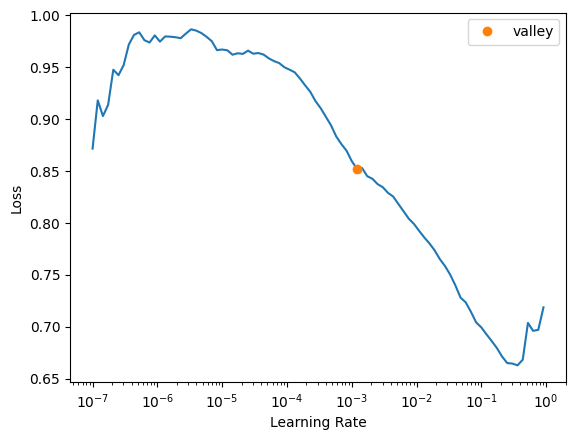

In [29]:
learn.lr_find()

The learning rate finder will do a __mock training__ by going over a large range of learning rates, then __plot them against the losses.__ We typically find the point where the slope is steepest. 

Here are some excellent resources that offer explanation: 
* https://fastai1.fast.ai/callbacks.one_cycle.html
* https://sgugger.github.io/the-1cycle-policy.html



__Fit the model__ based on the selected learning rate

In [30]:
learn.fit_one_cycle(5, lr_max=0.001)

epoch,train_loss,valid_loss,accuracy,time
0,0.421684,0.414763,0.802973,00:02
1,0.374680,0.363785,0.827294,00:03
2,0.367140,0.355273,0.830733,00:02
3,0.353273,0.349261,0.835033,00:02
4,0.346897,0.346737,0.836629,00:03


## Model Evaluation

We can then have a look at some predictions:

In [31]:
learn.show_results()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary,salary_pred
0,5.0,12.0,3.0,13.0,1.0,5.0,1.0,-0.853017,0.240389,-0.420295,0.0,0.0
1,1.0,12.0,3.0,1.0,1.0,5.0,1.0,2.956303,-0.229747,-0.420295,0.0,0.0
2,7.0,8.0,3.0,5.0,6.0,5.0,1.0,2.077229,2.283216,0.753897,1.0,1.0
3,5.0,12.0,5.0,5.0,4.0,5.0,1.0,0.612106,0.438355,-0.420295,0.0,0.0
4,2.0,16.0,1.0,5.0,5.0,3.0,1.0,-0.193712,-1.342658,-0.028898,1.0,0.0
5,5.0,12.0,3.0,13.0,1.0,5.0,1.0,-0.266968,0.175181,-0.420295,0.0,0.0
6,5.0,12.0,3.0,8.0,1.0,5.0,1.0,1.051643,0.645590,-0.420295,0.0,0.0
7,2.0,10.0,5.0,5.0,4.0,5.0,1.0,-0.559993,-0.472853,1.145294,0.0,0.0
8,8.0,16.0,3.0,12.0,1.0,5.0,1.0,-0.999530,-0.764657,-0.028898,0.0,0.0


__Get predictions__

We can use the `Learner.predict` method to get predictions. In this case, we need to pass the row of a dataframe that has the same names of categorical and continuous variables as our training or validation dataframe.

In [32]:
row, clas, probs = learn.predict(df.iloc[0])

In [33]:
df.iloc[0]

age                                49
workclass                     Private
fnlwgt                         101320
education                  Assoc-acdm
education-num                    12.0
marital-status     Married-civ-spouse
occupation                        NaN
relationship                     Wife
race                            White
sex                            Female
capital-gain                        0
capital-loss                     1902
hours-per-week                     40
native-country          United-States
salary                          >=50k
Name: 0, dtype: object

In [34]:
clas, probs

(tensor(0), tensor([0.7295, 0.2705]))

**Calculate performance metrics**

In [35]:
learn.validate()

(#2) [0.3467373549938202,0.8366293907165527]

... shows the validation loss and the validation metric (accuracy). 
We can manually compute this as:

In [36]:
probs, val_y = learn.get_preds(ds_idx=1)
preds = np.argmax(probs, axis=1)
accuracy_score(val_y, preds)

0.8366294067067928

To get prediction on a new dataframe, you can use the `test_dl` method of the DataLoaders. That dataframe does not need to have the dependent variable in its column.

In [37]:
test_df = df.copy()
test_df.drop(['salary'], axis=1, inplace=True)
dl = learn.dls.test_dl(test_df)

__Show rows result of predictions on the dataset__

In [38]:
learn.get_preds(dl=dl)

(tensor([[0.7295, 0.2705],
         [0.6033, 0.3967],
         [0.8076, 0.1924],
         ...,
         [0.7449, 0.2551],
         [0.8652, 0.1348],
         [0.9275, 0.0725]]),
 None)

So there is a scope of improving the deep learning model here. However this is not bad at all, without any feature engineering and network tuning.

## Embeddings for Categorical Variables

A key technique to making the most of deep learning for tabular data is to use embeddings for your categorical variables. This approach allows for __relationships between categories__ to be captured.

Examples:
- Saturday and Sunday may have similar behavior, and maybe Friday behaves like an average of a weekend and a weekday. 
-  Similarly, for zip codes, there may be patterns for zip codes that are geographically near each other, and for zip codes that are of similar socio-economic status.

### Applying Embeddings for Categorical Variables

When working with categorical variables, we will represent each category by a vector of floating point numbers (the values of this representation are learned as the network is trained).

For instance, a 4-dimensional version of an embedding for day of week could look like:

__Sunday	 [.8, .2, .1, .1]__<br>
__Monday	[.1, .2, .9, .9]__<br>
__Tuesday	[.2, .1, .9, .8]__

Here, Monday and Tuesday are fairly similar, yet they are both quite different from Sunday. 

Again, this is a toy example. In practice, our neural network would learn the best representations for each category while it is training, and each dimension (or direction, which doesn’t necessarily line up with ordinal dimensions) could have multiple meanings. Rich relationships can be captured in these distributed representations. 



The choice of the dimensions of the embeddings depends on many factors, such as training set size, complexity of the learning task and computational resources available.

Fast.ai (see [emb_sz_rule](https://docs.fast.ai/tabular.model.html#emb_sz_rule)) applies the following rule of thumb:

    "Through trial and error, this general rule takes the lower of two values:
        - A dimension space of 600
        - A dimension space equal to 1.6 times the cardinality of the variable to 0.56."

### Visualizing Embeddings with Tensorboard

Export embeddings:

In [39]:
for i, emb in enumerate(learn.model.embeds):
    emb_name = learn.dls.cat_names[i]
    writer.add_embedding(emb.weight.data, metadata=learn.dls.classes[emb_name],
                         global_step=i, tag=emb_name)

Finally, start tensorboard

In [40]:
%tensorboard --logdir tb-tabular

Reusing TensorBoard on port 6006 (pid 27428), started 0:01:05 ago. (Use '!kill 27428' to kill it.)

## Mentimeter

### Conclusion

For analyzing time series and tabular data, deep learning has recently been making great strides. However, deep learning is generally used as part of an **ensemble of multiple types** of model. 

- If you already have a system that is using random forests or gradient boosting machines, then switching to or adding deep learning may not result in any dramatic improvement. 
- Deep learning does greatly increase the variety of columns that you can include
    - columns containing natural language (book titles, reviews, etc.), 
    - high-cardinality categorical columns (i.e., something that contains a large number of discrete choices, such as zip code or product ID). 
- Deep learning models generally take longer to train than random forests or gradient boosting machines, although this is changing thanks to libraries such as [RAPIDS](https://rapids.ai/), which provides GPU acceleration for the whole modeling pipeline.

## Further Reading

Fur further practice, we rec
    * the materials and courses offeerd by [fastai](https://www.fast.ai/about.html)
    * The book: Jeremy Howard and Sylvian Gugger (2020), "Deep Learning for Coders with Fastai and PyTorch: AI Applications without a PhD." (2020). It's freely available as interactive [Jupyter Notebook](https://github.com/fastai/fastbook) 
    * Also Andrew NGs [Deep Learning Specialization](https://www.coursera.org/specializations/deep-learning?utm_medium=sem&utm_source=gg&utm_campaign=B2C_EMEA_deep-learning_deeplearning-ai_FTCOF_specializations_country-DE&campaignid=20416373453&adgroupid=155810822830&device=c&keyword=deep%20learning%20specialization&matchtype=b&network=g&devicemodel=&adposition=&creativeid=667829385242&hide_mobile_promo&gclid=Cj0KCQiAr8eqBhD3ARIsAIe-buNiwv5lVHgaI7bjlWFq52LxRgQNdlvNCevnV_33f_ZX8Dc4wKwLIUEaAiTCEALw_wcB) is a great course for learning more about the theory behind neural networks


<img src="images/d3.png" style="width:50%; float:center;" />